<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_409~451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**07 군집화**

# 01 K-평균 알고리즘 이해
* K-평균: 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.
* 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행.
* 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법
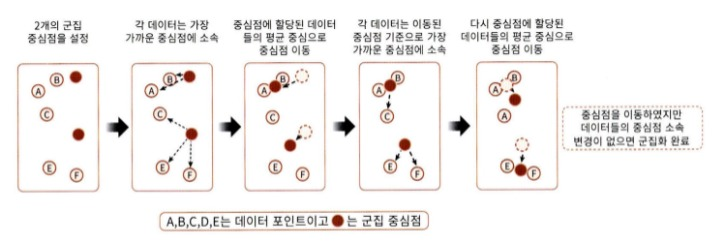

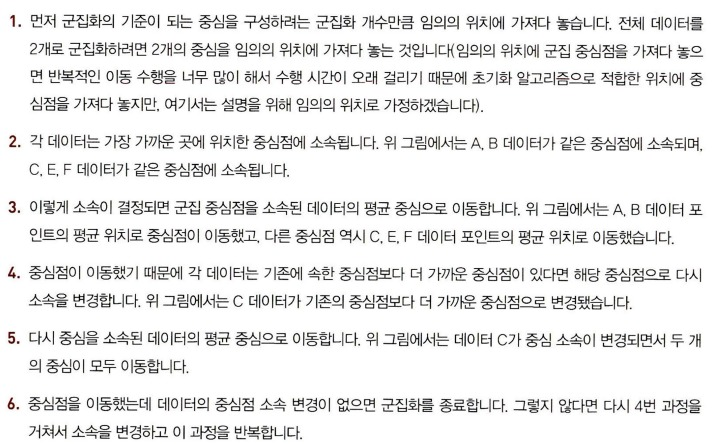

* K-평균의 장점
 * 일반적인 군집화에서 가장 많이 활용되는 알고리즘
 * 알고리즘이 쉽고 간결함

* K-평균의 단점
 * 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
 * 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
 * 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

**사이킷런 KMeans 클래스 소개**

In [1]:
"""
class sklearn.cluster.KMeans(n_clusters = 8, init = "k-means++", n_init = 10, max_iter = 300, tol = 0.0001,
                             precompute_distances = "auto", verbose = 0, random_state = None,
                             copy_x = True, n_jobs = 1, algorithm = "auto")
"""

'\nclass sklearn.cluster.KMeans(n_clusters = 8, init = "k-means++", n_init = 10, max_iter = 300, tol = 0.0001,\n                             precompute_distances = "auto", verbose = 0, random_state = None,\n                             copy_x = True, n_jobs = 1, algorithm = "auto")\n'

* KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미
* init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함
* max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함

* labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있음.

**K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF["target"] = iris.target
irisDF["cluster"] = kmeans.labels_
iris_result = irisDF.groupby(["target", "cluster"])["sepal_length"].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


* 분류 타깃이 0값인 데이터는 1번 군집으로 그루핑
* Target 1값 데이터는 2개만 2번 군집으로 그루핑됐고, 나머지 48개는 모두 0번 군집으로 그루핑
* Target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됨

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF["pca_y"] = pca_transformed[:, 1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


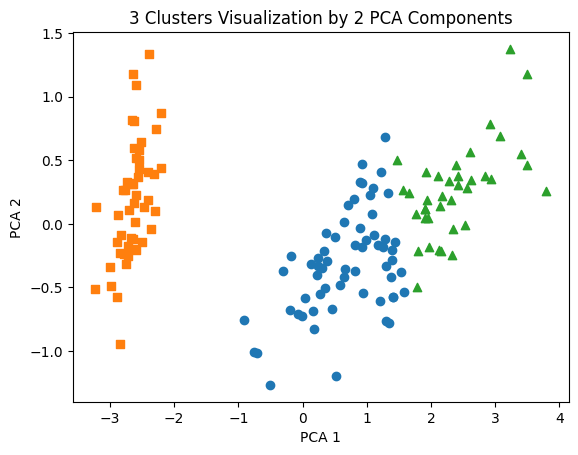

In [7]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF["cluster"] == 0].index
marker1_ind = irisDF[irisDF["cluster"] == 1].index
marker2_ind = irisDF[irisDF["cluster"] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x = irisDF.loc[marker0_ind, "pca_x"], y = irisDF.loc[marker0_ind, "pca_y"], marker = "o")
plt.scatter(x = irisDF.loc[marker1_ind, "pca_x"], y = irisDF.loc[marker1_ind, "pca_y"], marker = "s")
plt.scatter(x = irisDF.loc[marker2_ind, "pca_x"], y = irisDF.loc[marker2_ind, "pca_y"], marker = "^")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show()

* Cluster 0과 1의 경우 속성의 위치 자체가 명확하게 분리되기 어려운 부분이 존재

**군집화 알고리즘 테스트를 위한 데이터 생성**
* make_blobs(), make_classification(): 대표적인 군집화용 데이터 생성기
* 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있음
* make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가
* make_classification(): 노이즈를 포함한 데이터를 만드는 데 유용

* make_blobs()의 호출 파라미터
 * n_samples: 생성할 총 데이터의 개수
 * n_features: 데이터의 피처 개수
 * centers: int 값
 * cluster_std: 생성될 군집 데이터의 표준 편차를 의미

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


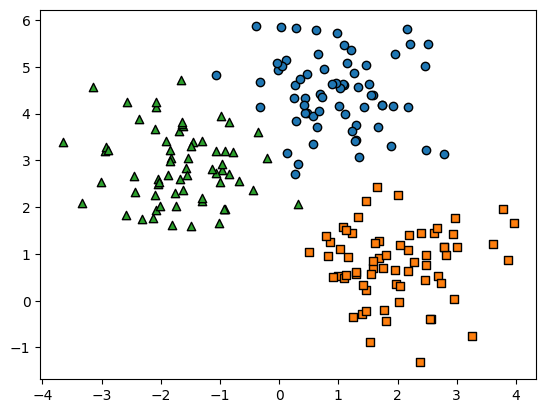

In [10]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ["o", "s", "^", "P", "D", "H", "x"]
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target == 0, target == 1, target == 2로 scatter plot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF["target"] == target]
  plt.scatter(x = target_cluster["ftr1"], y = target_cluster["ftr2"], edgecolor = "k",
              marker = markers[target])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


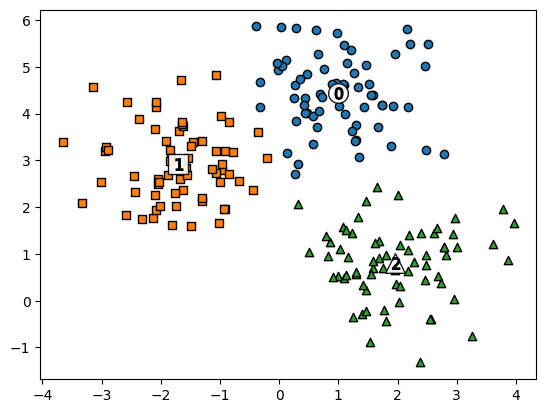

In [11]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF["kmeans_label"] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ["o", "s", "^", "P", "D", "H", "x"]

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF["kmeans_label"] == label]
  center_x_y = centers[label]
  plt.scatter(x = label_cluster["ftr1"], y = label_cluster["ftr2"], edgecolor = "k",
              marker = markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = "white",
              alpha = 0.9, edgecolor = "k", marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = "k", edgecolor = "k",
              marker = "$%d$" % label)

plt.show()

In [12]:
print(clusterDF.groupby("target")["kmeans_label"].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


* make_blobs()은 cluster_std 파라미터로 데이터의 분포도를 조절함
* cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음

# 02 군집 평가(Cluster Evaluation)
**실루엣 분석의 개요**
* 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미.
* 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것.
* 실루엣 계수: 개별 데이터가 가지는 군집화 지표. 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표.

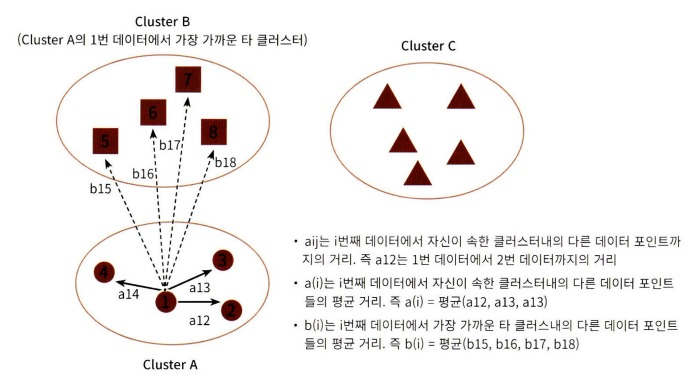



* 특정 데이터 포인트의 실루엣 계수 값은 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값 a(i), 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 b(i)를 기반으로 계산됨.
* 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) ~ a(i)이며 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눔.
* $s(i) = \frac{b(i) - a(i)}{(max(a(i), b(i))} $
* 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것. - 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.
* 좋은 군집화의 기준
 * 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0 ~ 1사이의 값을 가지며, 1에 가까울수록 좋음
 * 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함.

 **붓꽃 데이터 세트를 이용한 군집 평가**


In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0).fit(irisDF)
irisDF["cluster"] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF["cluster"])
print("silhouette_samples() return 값의 shape", score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF["silhouette_coeff"] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF["cluster"])
print("붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}".format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [14]:
irisDF.groupby("cluster")["silhouette_coeff"].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**
* 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음.

* 군집의 개수가 2개일 경우
 * 실루엣 계수: 0.704
 * 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만, 2번 군집의 경우는 평균보다 적은 데이터 값이 매우 많음

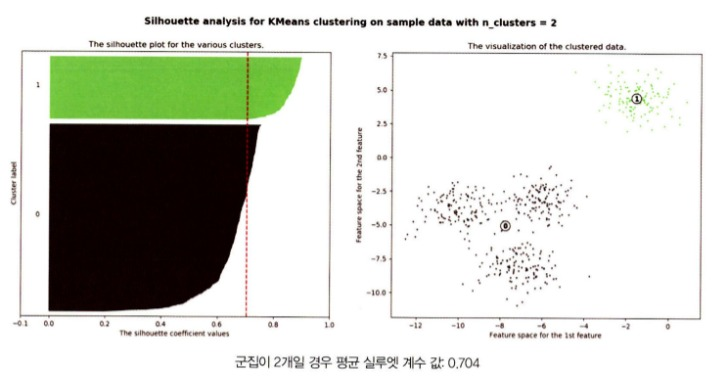

* 군집의 개수가 3개일 경우
 * 실루엣 계수: 0.588
 * 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮음

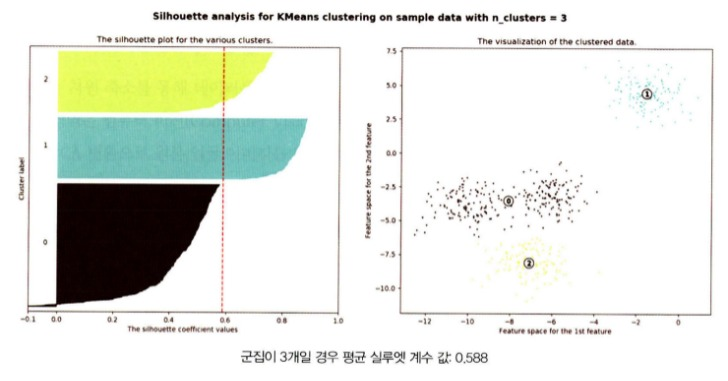

 * 군집의 개수가 4개일 경우
  * 실루엣 계수: 0.65
  * 1번 군집의 경우 모든 데이터가 평균보다 높은 계수 값을 가지고 있으며, 0번, 2번의 경우는 절반 이상이 평균보다 높은 계수 값을, 3번 군집의 경우만 약 1/3 정도가 평균보다 높은 계수 값을 가지고 있음

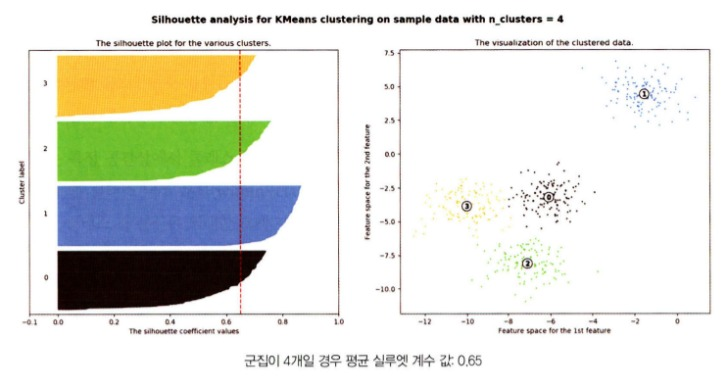

In [15]:
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

In [16]:
# visualize_silhouette([2, 3, 4, 5], X_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


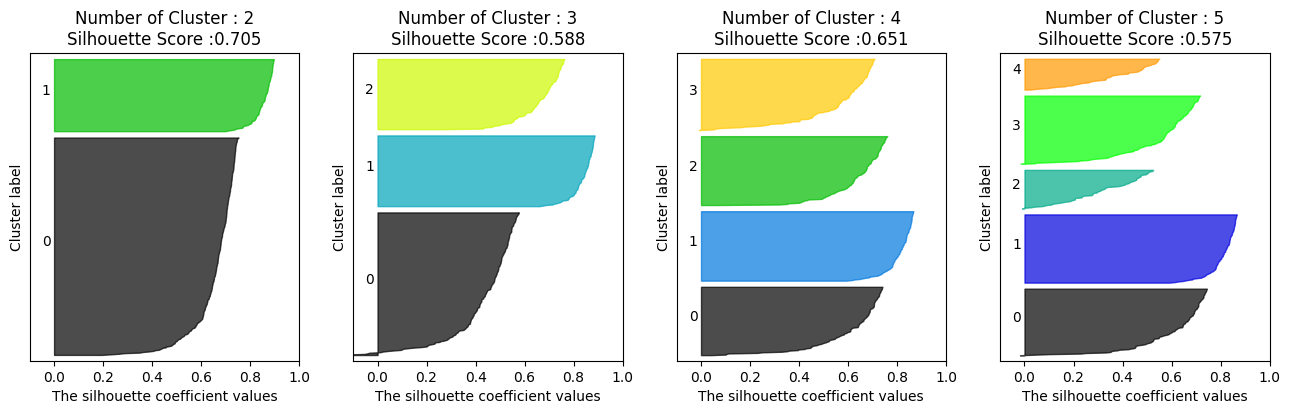

In [17]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 1,
                  center_box = (-10.0, 10.0), shuffle = True, random_state = 1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


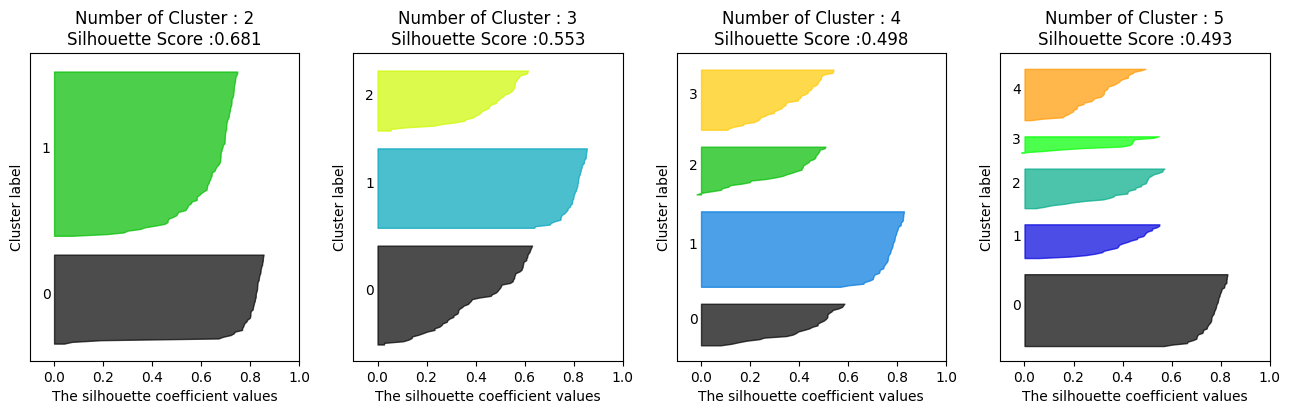

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

* 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어남
* 이 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방법을 고민해야 함.

#03 평균 이동
**평균 이동(Mean Shift)의 개요**
* 평균 이동(Mean Shift): K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행.
* K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
* 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수(probability density function)을 이용함
* 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE를 이용.
* 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취함.

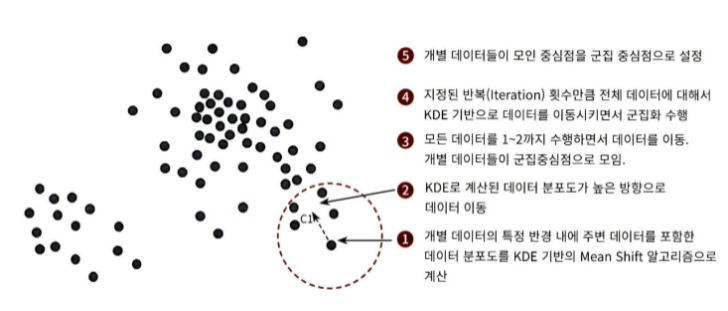

* KDE(Kernel Density Estimation): 커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정함.
* 확률 밀도 함수 PDF(Probability Density Function): 확률 변수의 분포를 나타내는 함수. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성, 확률 분포 등 변수의 많은 요소를 알 수 있음.
* KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용됨.
* $KDE = \frac{1}{n}  \sum_{i=1}^n K_{h}(x-x_{i}) =  \frac{1}{nh} \sum_{i=1}^n K( \frac{x-x_{i}}{h} )$
* 대역폭 h는 KDE 형태를 부드러운(또는 표족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있음.
* 작은 h 값은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉬움
* 매우 큰 h 값은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉬움.
* 따라서 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요.
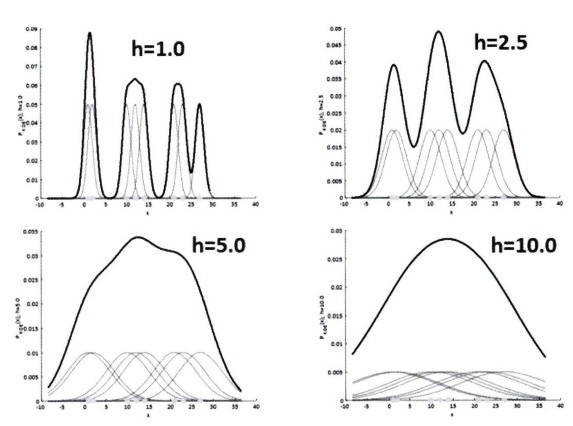

* 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐.
* 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행함.
* MeanShift 클래스의 가장 중요한 초기화 파라미터는 bandwidth이며 이 파라미터는 KDE의 대역폭 h와 동일.
* 대역폭 크기 설정이 군집화의 품질에 큰 영향을 미치기 때문에 사잇킷런은 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공.

In [19]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.7, random_state = 0)

meanshift = MeanShift(bandwidth = 0.8)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형: ", np.unique(cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


* 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐

In [20]:
meanshift = MeanShift(bandwidth = 1)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형: ", np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


* MeanShift에서는 bandwidth를 최적화 값으로 설정하는 것이 매우 중요
* estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력해주면 최적화된 bandwidth 값을 반환함

In [21]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth 값: ", round(bandwidth, 3))

bandwidth 값:  1.816


In [22]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형: ", np.unique(cluster_labels))

cluster labels 유형:  [0 1 2]


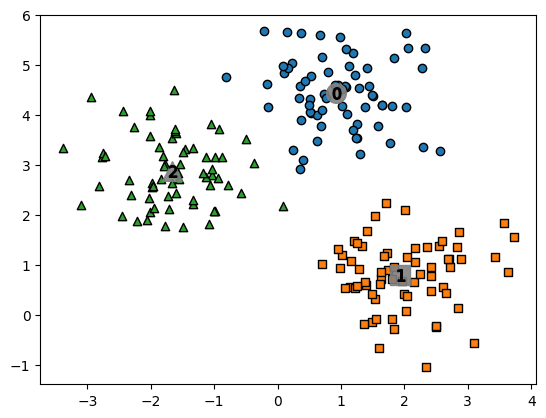

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF["meanshift_label"] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ["o", "s", "^", "x", "*"]

for label in unique_labels:
  label_cluster = clusterDF[clusterDF["meanshift_label"] == label]
  center_x_y = centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x = label_cluster["ftr1"], y = label_cluster["ftr2"], edgecolor = "k", marker = markers[label])

  # 군집별 중심 표현
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = "gray", alpha = 0.9,
              marker = markers[label])
  plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = "k", marker = "$%d$" % label)

plt.show()

In [24]:
print(clusterDF.groupby("target")["meanshift_label"].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


* 평균 이동의 장점
 * 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능함.
 * 이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요도 없음

* 평균 이동의 단점
 * 알고리즘의 수행 시간이 오래 걸림
 * band-width의 크기에 따른 군집화 영향도가 매우 큼

# 04 GMM(Gaussian Mixture Model)

**GMM(Gaussian Mixture Model) 소개**
* GMM 군집화: 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
* 정규 분포로도 알려진 가우시안 분포는 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수
* 정규 분포는 평균 $μ$를 중심으로 높은 데이터 분포도를 가지고 있으며, 좌우 표준편차 1에 전체 데이터의 68.27%, 좌우 표준편차 2에 전체 데이터의 95.45%를 가지고 있음.
* 표준 정규 분포: 평균이 0이고, 표준편차가 1인 정규 분포
* GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주하며, 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출함.
* 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식.

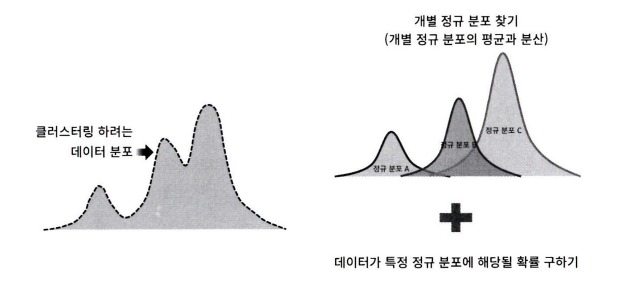

* 모수 추정
 * 개별 정규 분포의 평균과 분산
 * 각 데이터가 어떤 정규 분포에 해당되는지의 확률

* 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용함
* 사이킷런은 GMM의 EM 방식을 통한 모수 추정 군집화를 지원하기 위해 Gaussian Mixture 클래스를 지원

**GMM을 이용한 붓꽃 데이터 세트 군집화**

In [25]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF["target"] = iris.target

* n_components: gaussian mixture 모델의 총 개수

In [26]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 "gmm_cluster" 칼럼 명으로 저장
irisDF["gmm_cluster"] = gmm_cluster_labels
irisDF["target"] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(["target"])["gmm_cluster"].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


* Target 0은 cluster 0으로, Target 2는 cluster 1로 매핑됨.
* Target 1만 cluster 2로 45개(90%), cluster 1로 5개(10%) 매핑됨.

In [27]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF["kmeans_cluster"] = kmeans_cluster_labels
iris_result = irisDF.groupby(["target"])["kmeans_cluster"].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* 붓꽃 데이터 세트가 GMM 군집화에 더 효과적
* K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있음

**GMM과 K-평균의 비교**
* KMeans
 * 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아짐
 * 데이터가 길쭉한 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못함

* visualize_cluster_plot() 함수의 인자
 * clusterobj: 사이킷런의 군집 수행 객체
 * dataframe: 피처 데이터 세트와 label 값을 가진 DataFrame
 * label_name: 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼 명, make_blobs() 결과 시각화일 경우는 dataframe 내의 target 칼럼 명
 * iscenter: 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 False

In [28]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

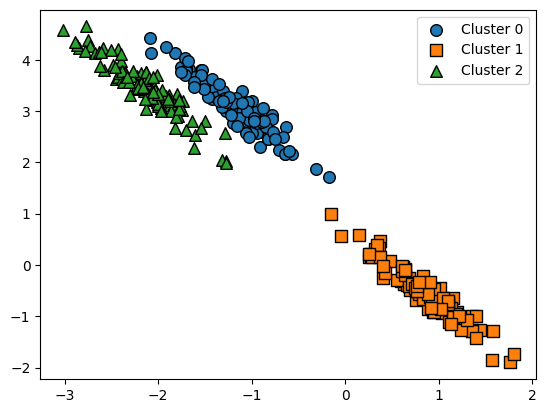

In [29]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std = 0.5를 만듦.
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.5, random_state = 0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 세트의 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data = X_aniso, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, "target", iscenter = False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


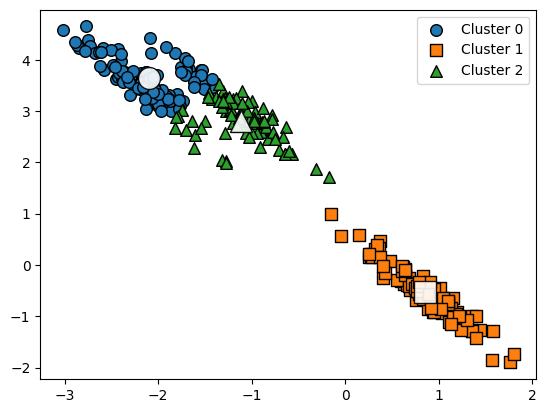

In [30]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state = 0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF["kmeans_label"] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, "kmeans_label", iscenter = True)

* KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음

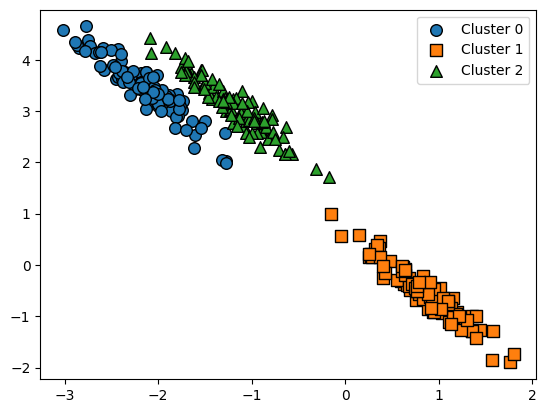

In [31]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF["gmm_label"] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscluster를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, "gmm_label", iscenter = False)

* 데이터가 분포된 방향에 따라 정확하게 군집화됨.

In [32]:
print("### KMeans Clustering ###")
print(clusterDF.groupby("target")["kmeans_label"].value_counts())
print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby("target")["gmm_label"].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


* KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target 값과 어긋나는 경우가 발생.
* GMM의 경우 군집이 target 값과 잘 매핑.
* GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만, 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있음.

# 05 DBSCAN
**DBSCAN 개요**
* DBSCAN은 간단하고 직관적인 알고리즘으로 돼 있음에도 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화가 가능함
* 내부의 원 모양과 외부의 원 모양 형태의 분포를 가진 데이터 세트를 군집화한다고 가정할 때 K 평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기 어려움
* DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행함.
* 파라미터
 * 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
 * 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
* 입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의함
 * 핵심 포인트(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
 * 아웃 포인트(Neighbor Point): 주변 영역 내에 위치한 타 데이터
 * 경계 포인트(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터
 * 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터

 **DBSCAN 적용하기 - 붓꽃 데이터 세트**


In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6,min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


* 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
* Target 값의 유형이 3가지인데, 군집이 2개가 됐다고 군집화 횽ㄹ이 떨어진다는 의미는 아님.


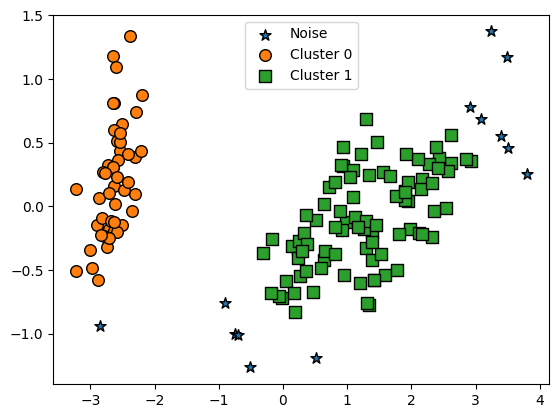

In [36]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components = 2로 피처 데이터 세트 변환
pca = PCA(n_components = 2, random_state = 0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF["ftr1"] = pca_transformed[:, 0]
irisDF["ftr2"] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, "dbscan_cluster", iscenter = False)

* DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
* DBSCAN 알고리즘에 적절한 eps와 min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요
* 일반적으로 eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
* min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


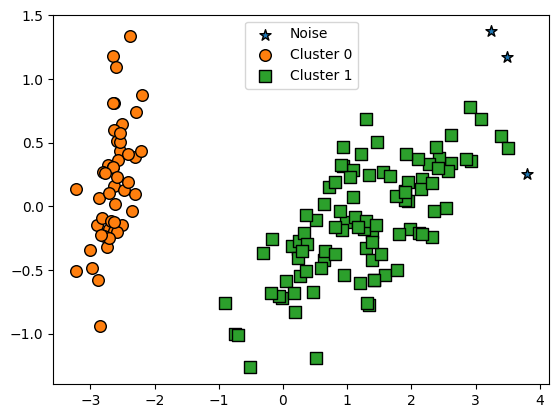

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.8, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [42]:
dbscan = DBSCAN(eps = 0.6, min_samples = 16, metric = "euclidean")

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


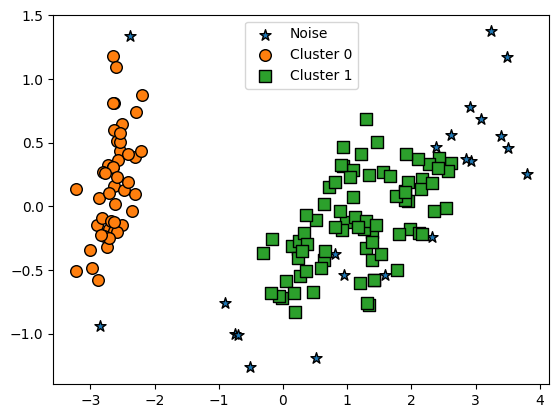

In [43]:
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF["dbscan_cluster"] = dbscan_labels
irisDF["target"] = iris.target

iris_result = irisDF.groupby(["target"])["dbscan_cluster"].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**DBSCAN 적용하기 - make_circles() 데이터 세트**

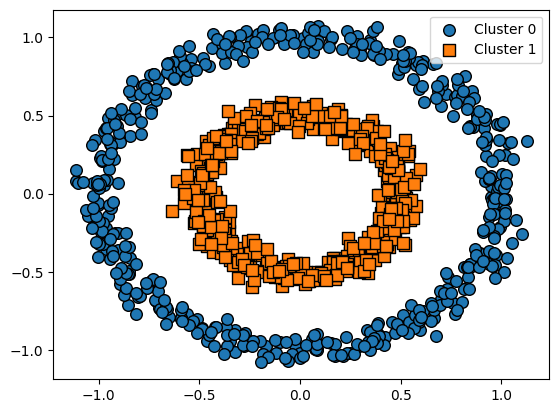

In [45]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state = 0, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ["ftr1", "ftr2"])
clusterDF["target"] = y

visualize_cluster_plot(None, clusterDF, "target", iscenter = False)

* make_circles()는 내부 원과 외부 원으로 구분되는 데이터 세트를 생성함

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


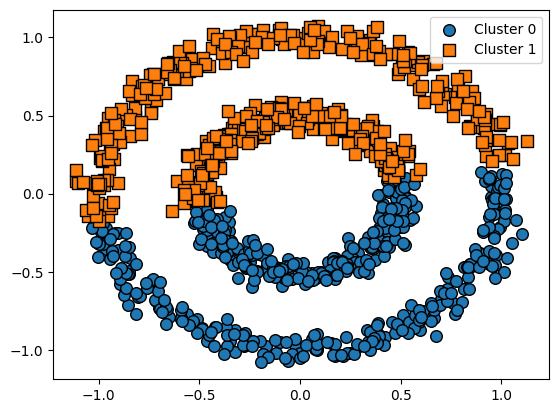

In [46]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, "kmeans_cluster", iscenter = False)

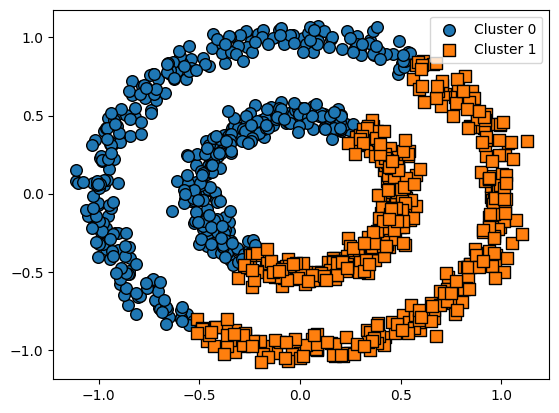

In [47]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm_label = gmm.fit(X).predict(X)
clusterDF["gmm_cluster"] = gmm_label

visualize_cluster_plot(gmm, clusterDF, "gmm_cluster", iscenter = False)

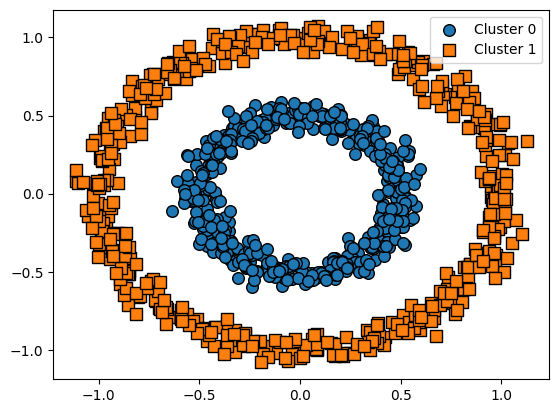

In [48]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 10, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(X)
clusterDF["dbscan_cluster"] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, "dbscan_cluster", iscenter = False)